#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [1]:
import torch
import numpy as np

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [2]:
#https://tutorials.pytorch.kr/beginner/basics/tensorqs_tutorial.html
#https://teddylee777.github.io/pytorch/pytorch-tensors-basic

shape = (4,3,)

# tensor 생성방법 
## 1.1. torch.rand() : 0에서 1사이의 랜덤 실수 생성
X=torch.rand(shape,dtype=torch.float)
Y=torch.rand(shape,dtype=torch.float)

## 1.2. torch.randn(): standard normal 분포 안에서 랜덤한 tensor를 생성합니다.
X = torch.randn(shape)
Y = torch.randn(shape)

## 1.3. torch.randint(): 정수로 채워진 랜덤한 tensor를 생성합니다.
X = torch.randint(low=1, high=12, size=shape)
Y = torch.randint(low=1, high=12, size=shape)

## 1.4. torch.normal() random numbers drawn from separate normal distributions 
#               whose mean and standard deviation are given.
X = torch.normal(0, 1, shape)
Y = torch.normal(0, 1, shape)

## 2. torch.zeros(): 0으로 채움
X=torch.zeros(shape)
Y=torch.zeros(shape)

## 3. torch.ones(): 1로 채움
X=torch.ones(shape)
Y=torch.ones(shape)

## 4. numpy로부터 torch로 tensor 변환
arr = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
mat = np.matrix([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

X=torch.from_numpy(arr)
Y=torch.as_tensor(mat)
### OR 
X=torch.tensor(arr)
Y=torch.tensor(mat)

## 4. torch.arange(start,end+1,step) & reshape
X = torch.arange(1, 13, 1).reshape(shape)
Y = torch.arange(1, 13, 1).reshape(shape)

X = torch.randint(low=1, high=12, size=shape)
Y = torch.randint(low=1, high=12, size=shape)



print(torch.cat([X,Y], dim=0)) ###행으로 병합 코드 dim = 0
print(torch.cat([X,Y], dim=1)) ###열로 병합 코드 dim = 1




tensor([[ 1,  6,  4],
        [10,  6,  3],
        [ 4,  2,  7],
        [10,  7,  2],
        [ 4,  9,  7],
        [ 3,  7,  7],
        [ 1,  5,  5],
        [ 2,  7,  5]])
tensor([[ 1,  6,  4,  4,  9,  7],
        [10,  6,  3,  3,  7,  7],
        [ 4,  2,  7,  1,  5,  5],
        [10,  7,  2,  2,  7,  5]])


In [3]:
X

tensor([[ 1,  6,  4],
        [10,  6,  3],
        [ 4,  2,  7],
        [10,  7,  2]])

In [4]:
len(X) # tensor 의 len() 값은 가장 바깥의 []안의 콤마 단위의 개수..?

4

linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [5]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [6]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [7]:
# len()의 개념 : 가장 바깥의 []안의 콤마 단위의 개수..?
print(len([1,2])) 
print(len([[1,2]]))

2
1


In [8]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w))) # shape == (2000, 1 )
    y = torch.matmul(X, w) + b    #torch.matmul(a, b): a x b 행렬 곱
                                  #
    y += torch.normal(0, 0.01, y.shape) # y.shape == 2000
    # print(len(y))
    return X, y.reshape((-1, 1)) # shape에 -1을 넣으면 자동으로 만듦
                                 # 행 개수 = -1 이므로 y의 행 개수 따름
true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000) 

# features is tensor X which shape is (2000, 2)
# labels is tensor X which shape is (2000, 1)

In [9]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 1.5829, -0.3960]) 
label: tensor([10.8393])


In [10]:

def data_iter(batch_size, features, labels):
    num_examples = len(features)  #2000
    indices = list(range(num_examples)) # 0 ~ 1999
    # The examples are read at random, in no particular order
    random.shuffle(indices) # 0~ 1999 랜덤한 순서로 저장
     ###반복문으로 채워넣기:
    for i in range(0, num_examples, batch_size): 
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        # ex) 500번째부터 ~519번까지의 indices 값 20개를 추출하여 tensor로 변환
        # print(batch_indices)
        yield features[batch_indices], labels[batch_indices]

In [11]:
batch_size = 20 # 행 수

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break # 

tensor([[ 0.9842, -0.1424],
        [-0.0303, -0.6993],
        [-0.7565, -0.2151],
        [ 0.2957,  0.5076],
        [ 0.5619,  1.3784],
        [-0.2116, -0.4562],
        [-0.7890, -0.8879],
        [-2.2227,  0.6215],
        [ 1.2080, -0.5744],
        [-0.7095,  0.8719],
        [ 0.7134,  0.5563],
        [ 1.6614, -0.6500],
        [-1.1957, -1.2651],
        [-0.6198,  0.4192],
        [ 0.7543,  2.0538],
        [ 0.9478, -0.6000],
        [ 2.0713, -0.5676],
        [-1.1913, -0.7439],
        [ 0.4829,  0.0537],
        [-0.9485, -1.3456]]) 
 tensor([[ 8.6660],
        [ 6.4760],
        [ 3.5465],
        [ 5.6244],
        [ 5.1172],
        [ 5.5431],
        [ 4.4739],
        [-2.0934],
        [ 9.9913],
        [ 2.0621],
        [ 6.8063],
        [11.4496],
        [ 3.8144],
        [ 3.0308],
        [ 4.6941],
        [ 9.2239],
        [12.5633],
        [ 3.0418],
        [ 6.8539],
        [ 4.6864]])


In [12]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [13]:
print(w)
print(b)

tensor([[ 0.0027],
        [-0.0021]], requires_grad=True)
tensor([0.], requires_grad=True)


In [14]:
def linreg(X, w, b):
    """The linear regression model."""
    ###lr func 코드 완성하기
    return torch.matmul(X, w) + b 

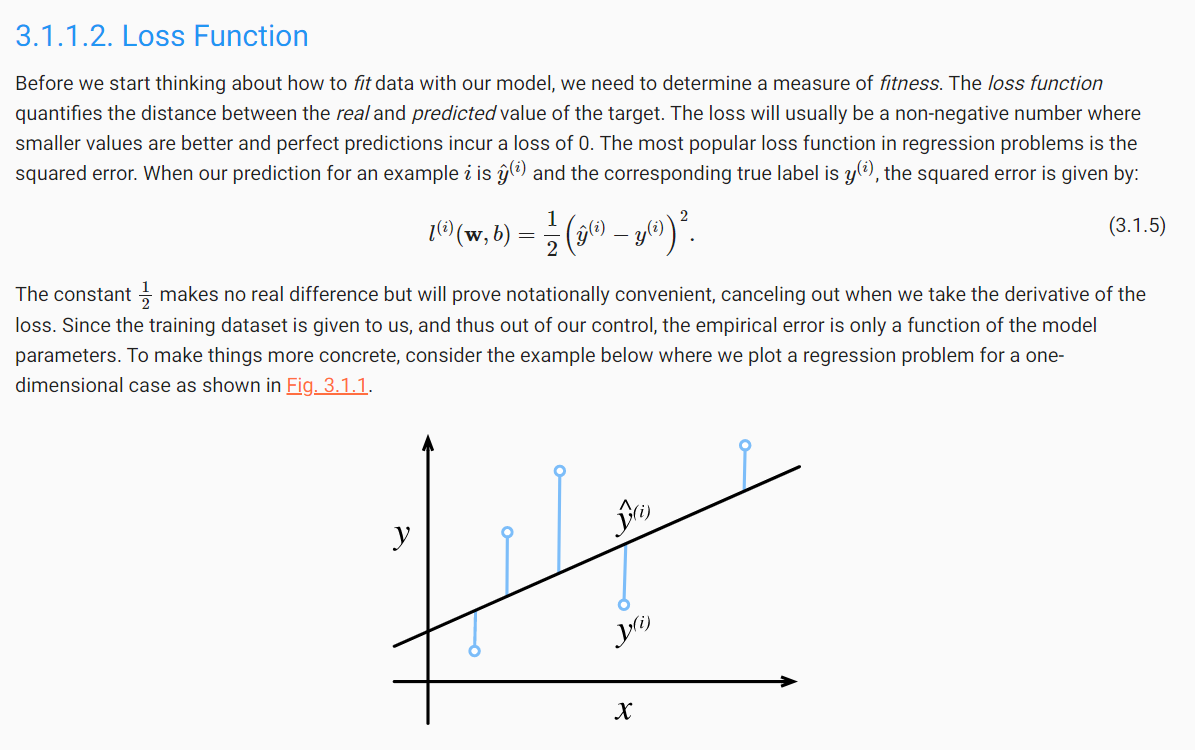

In [15]:
# screenshot source and reference: https://d2l.ai/chapter_linear-networks/linear-regression-scratch.html

def squared_loss(y_hat, y):  
    """Squared loss."""
    ###loss function 직접 짜보기(D2L)
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 


In [16]:
# Pytorch 를 이용해서 모델을 학습한 뒤, 모델을 평가할 때 model.eval() 과 with torch.no_grad() 를 자주 사용한다.
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    # https://light-tree.tistory.com/133
    # ㄴ msgd, sgd, bgd 설명(gd의 종류인 듯)
    with torch.no_grad(): # torch.no_grad class's source : https://pytorch.org/docs/stable/_modules/torch/autograd/grad_mode.html#no_grad
    # with 문 복습: https://pythondocs.net/uncategorized/%ED%8C%8C%EC%9D%B4%EC%8D%AC-with-%EC%A0%95%EB%A6%AC/
        ###반복문으로 채워넣기 (reference: https://d2l.ai/chapter_linear-networks/linear-regression-scratch.html)
        for param in params:
            param -=lr * param.grad / batch_size
            # param = param - lr * param.grad / batch_size #으로 하면 밑 코드 실행이 안 됨 ㅠㅠ ?????질문???? 
            param.grad.zero_()
            # grad.zero_의 이해 (https://velog.io/@kjb0531/zerograd%EC%9D%98-%EC%9D%B4%ED%95%B4)

In [17]:
# (ref: https://d2l.ai/chapter_linear-networks/linear-regression-scratch.html )

lr = 0.03 ###(학습률로써 초모수임) # 학습률 learning rate 복습: https://brunch.co.kr/@linecard/462
num_epochs = 3 ###(학습단위로써 초모수임)
net = linreg ###위에서 가져오기
loss = squared_loss ###위에서 가져오기

w0 = []
w1 = []
loss_w0 = []
loss_w1 =[]
b0 = []

for epoch in range(num_epochs): # 3번 반복!
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) ###채워넣기
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient 
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

        w0.append(w.tolist()[0])
        w1.append(w.tolist()[1])
        b0.append(b.tolist())
        loss_w0.append(train_l[0].mean())
        loss_w1.append(train_l[1].mean())

epoch 1, loss 0.047313
epoch 2, loss 0.000161
epoch 3, loss 0.000052


In [18]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0002, -0.0001], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0006], grad_fn=<RsubBackward1>)


+cost graph 그리기 (x축 w, y축 loss)

In [19]:
# !python -m pip uninstall matplotlib
# !pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/uninstall.py", line 8

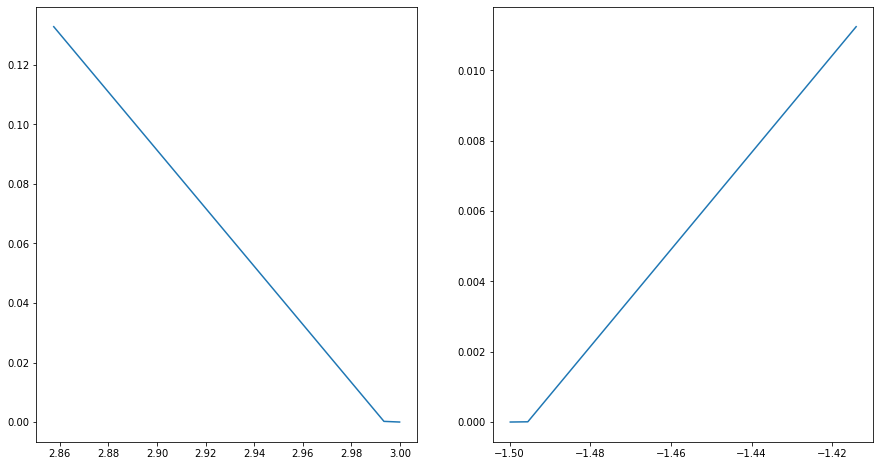

In [20]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 8))

plt.subplot(1, 2, 1)
plt.plot(w0, loss_w0)

plt.subplot(1, 2, 2)
plt.plot(w1, loss_w1)


concise implementation of linear regression 
- api 사용해보기 ( https://d2l.ai/chapter_linear-networks/linear-regression-concise.html)


In [21]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [22]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [23]:
# next() 함수는 객체의 __next__ 매서드를 호출합니다.
# iter() 함수는 객체의 __iter__ 매서드를 호출합니다.
# here we use iter to construct a Python iterator and use next to obtain the first item from the iterator.
next(iter(data_iter))

[tensor([[-1.3730, -1.1333],
         [ 1.1119, -1.1576],
         [-0.8694, -0.1700],
         [-0.7149, -0.3199],
         [ 1.1192,  0.9186],
         [-1.9815, -1.0337],
         [ 0.6222,  0.2415],
         [ 0.5256, -0.2779],
         [ 0.2814,  1.4794],
         [ 0.1828, -0.2509],
         [ 0.0773,  0.7774],
         [-0.1864, -0.0165],
         [ 1.5168,  1.4191],
         [-0.4270, -1.8590],
         [-0.2595,  0.0108],
         [-0.1142, -1.4879],
         [ 0.6983,  0.6835],
         [ 1.1068, -0.6626],
         [ 0.3011,  0.3718],
         [ 0.5467,  0.5448]]), tensor([[ 3.0824],
         [10.5474],
         [ 3.1333],
         [ 3.8318],
         [ 7.4869],
         [ 1.1049],
         [ 7.0081],
         [ 7.4806],
         [ 4.1214],
         [ 6.4284],
         [ 4.5716],
         [ 4.9580],
         [ 7.9278],
         [ 7.0097],
         [ 4.7108],
         [ 7.3987],
         [ 6.5623],
         [ 9.8229],
         [ 5.8454],
         [ 6.3356]])]

In [24]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1)) ### 채워넣기

In [25]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [26]:
loss = nn.MSELoss() ###api function으로 직접 설정

In [27]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03) ###api function으로 직접 설정

In [28]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y) ###직접설정
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000326
epoch 2, loss 0.000097
epoch 3, loss 0.000098


In [29]:
w = net[0].weight.data ###학습결과 w 구하는 식
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data ###학습결과 b 구하는 식
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-3.6478e-05,  2.8205e-04])
error in estimating b: tensor([-0.0003])
